In [ ]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [ ]:
!unzip "/content/Mydrive/MyDrive/Dados/databirds.zip" -d "/content/Mydrive/MyDrive/Dados/databirds"

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/Mydrive/MyDrive/Dados/databirds/databirds/Strigidae/3005887q_919b3da779e430c8a47a6eedd847570c.jpg  
  inflating: /content/Mydrive/MyDrive/Dados/databirds/databirds/Strigidae/300609q_4791337604f0cafde73ff53decc1a342.jpg  
  inflating: /content/Mydrive/MyDrive/Dados/databirds/databirds/Strigidae/3006294q_9275d670988ad993523a5ba2334f9446.jpg  
  inflating: /content/Mydrive/MyDrive/Dados/databirds/databirds/Strigidae/3006567q_0b4e0d37b3d8fe72c84374e41410f4a5.jpg  
  inflating: /content/Mydrive/MyDrive/Dados/databirds/databirds/Strigidae/3006899q_61297c2c15833a70309ec82c390ff612.jpg  
  inflating: /content/Mydrive/MyDrive/Dados/databirds/databirds/Strigidae/3006901q_5e355f1788e3394ab99a2c9990ba9f23.jpg  
  inflating: /content/Mydrive/MyDrive/Dados/databirds/databirds/Strigidae/3007423q_21ee6fe66c825bc5ce96477a56531995.jpg  
  inflating: /content/Mydrive/MyDrive/Dados/databirds/databirds/Strigidae/3007455q_65228

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

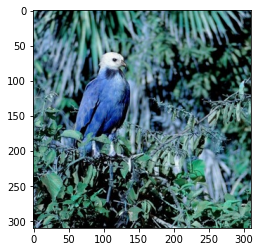

In [ ]:
DATADIR = "/content/Mydrive/MyDrive/Dados/databirds/databirds"
CATEGORIES = ['Accipitridae', 'Cathartidae', 'Falconidae', 'Pandionidae', 'Strigidae', 'Tytonidae']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
print(img_array.shape)

(310, 310, 3)


In [ ]:
data = []
IMG_SIZE = 224
# 0 -'Accipitridae', 1 -'Cathartidae', 2 - 'Falconidae', 3 - 'Pandionidae', 4 - 'Strigidae', 5 - 'Tytonidae'
def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                pass

In [ ]:
create_data()

In [ ]:
print(len(data))

41650


In [ ]:
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)

In [ ]:
#################################################################################################
# Problemas com a memoria do colab! 
# Olhar o documento Assignment - Transfer Learning2.0.ipynb que foi rodado na minha maquina! 
##################################################################################################

X = np.array(X).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
